In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_movies_credits=pd.read_csv('data_movies_credits_datos_filtrados')

In [38]:
data_movies_credits[['budget','popularity','revenue','vote_average','vote_count','return','release_year']].describe()

,budget,popularity,revenue,vote_average,vote_count,return,release_year
count,4.537500e+04,45375.000000,4.537500e+04,45375.000000,45375.000000,4.537500e+04,45375.000000
mean,4.234616e+06,2.926272,1.123180e+07,5.623713,110.102876,6.600574e+02,1991.874336
std,1.744085e+07,6.009790,6.439077e+07,1.915745,491.749279,7.469412e+04,24.061383
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.388764,0.000000e+00,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,1.130083,0.000000e+00,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,3.690686,0.000000e+00,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07,2020.000000


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'return'}>,
        <Axes: title={'center': 'release_year'}>]], dtype=object)

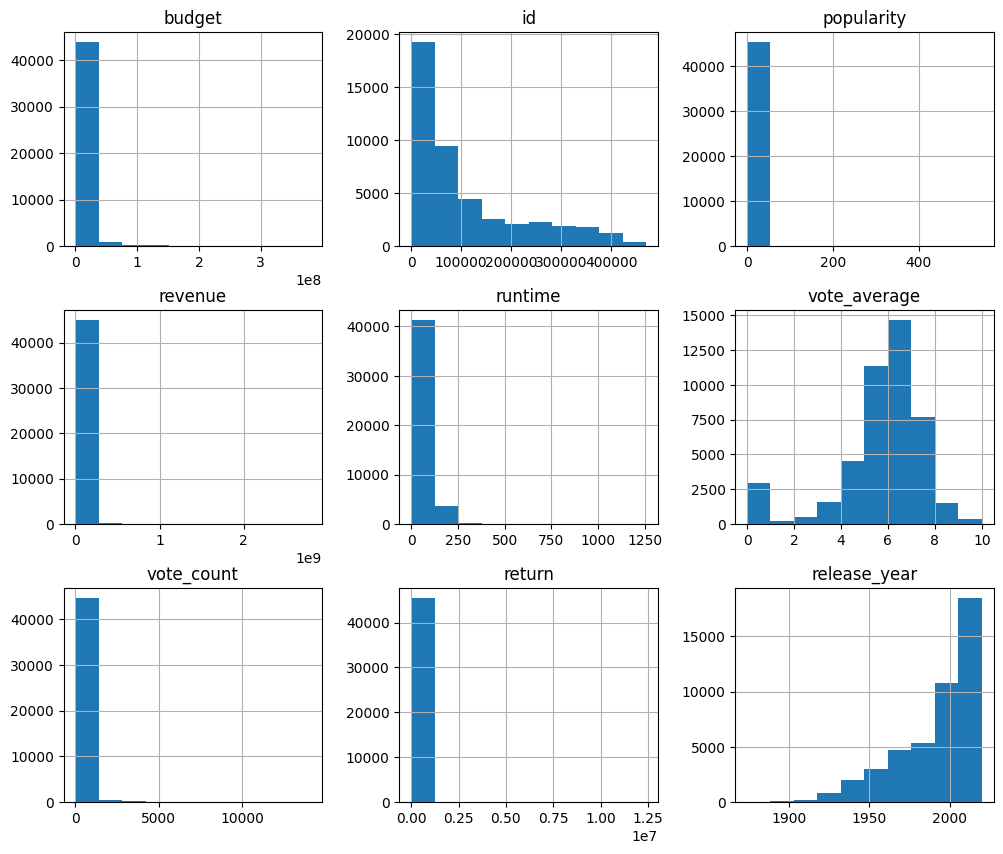

In [39]:
data_movies_credits.hist(figsize=(12, 10))

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_9644\4151281537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_movies_credits.corr()


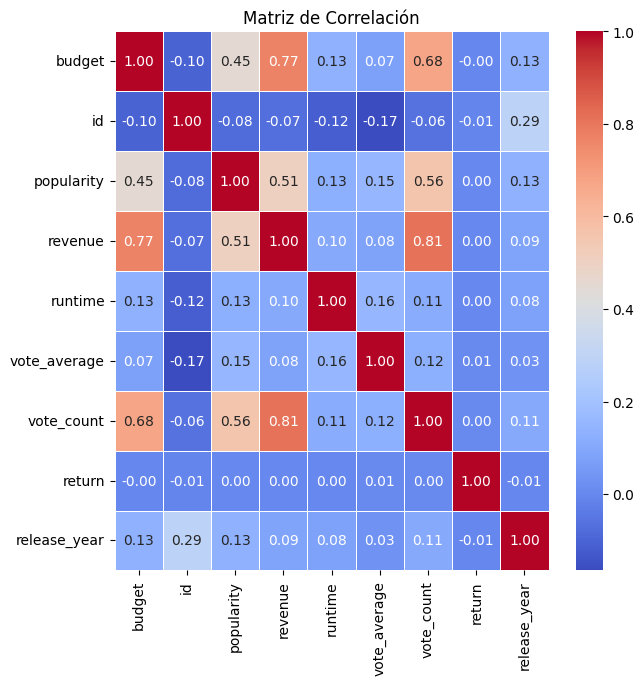

In [130]:
correlation_matrix = data_movies_credits.corr()
correlation_matrix
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Relación de variables. 

In [ ]:
#A continuacióm se presenta las variables que presentan una relación superior a la media:
#budget-revenue (0.768738)
#popularity -vote_count(0.559937),revenue(0.506183)
#revenue- vote_count(0.812013)

In [33]:
data_movies_credits.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,cast,crew
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter']


In [112]:
y_popularity=data_movies_credits['popularity'].value_counts()
y_popularity=y_popularity.reset_index()
y_popularity.columns=['Puntaje','Count']
y_popularity = y_popularity.sort_values(by='Puntaje', ascending=False)
y_popularity

,Puntaje,Count
4438,547.488298,1
3841,294.337037,1
11915,287.253654,1
16124,228.032744,1
6048,213.849907,1
...,...,...
60,0.000004,5
44,0.000003,6
43,0.000002,6
0,0.000001,56


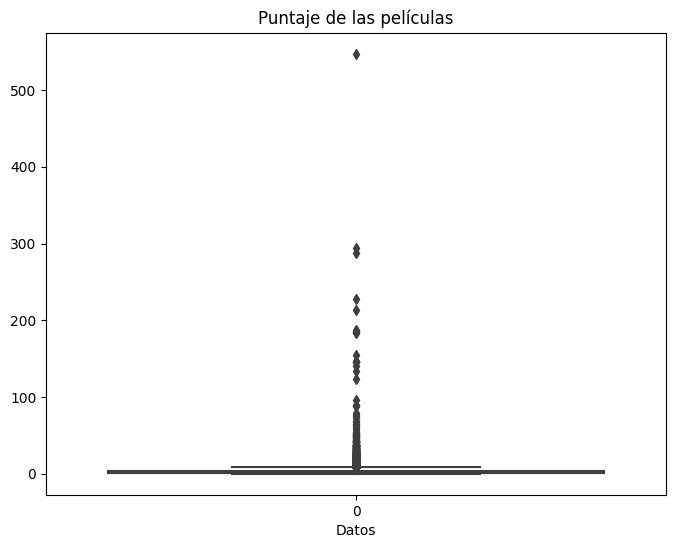

In [123]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data_movies_credits['popularity'])
plt.xlabel('Datos')
plt.title('Puntaje de las películas')
plt.show()

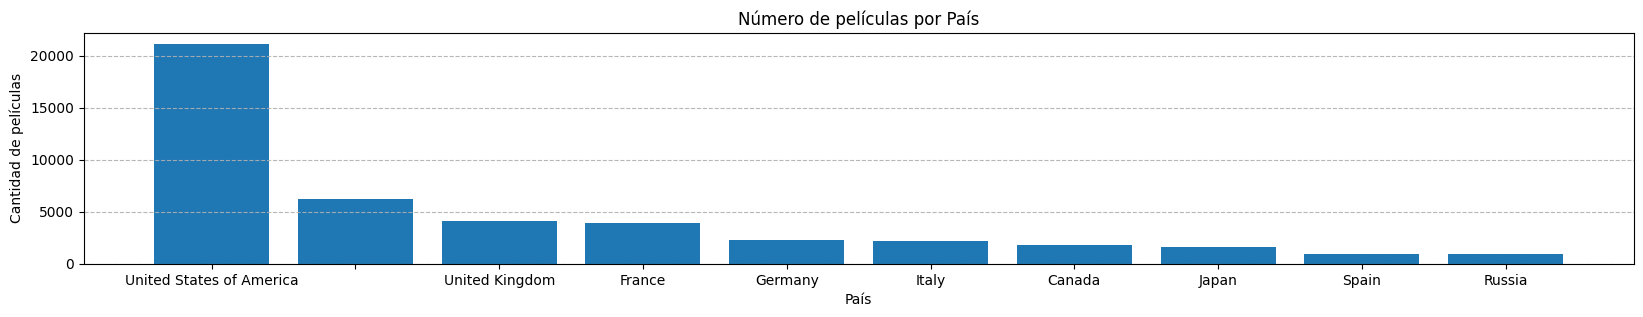

In [76]:
# Definimos el array proporcionado
data_array = data_movies_credits['production_countries'].values

# Filtramos el array para eliminar los elementos con '...'
filtered_array = data_array[data_array != '...']

# Creamos un diccionario para almacenar las frecuencias de cada categoría
category_count = {}

# Procesamos cada elemento del array filtrado y contamos las categorías
for item in filtered_array:
    # Eliminamos los corchetes y comillas para obtener una lista de categorías
    categories = item.strip("[]'").split("', '")
    # Contamos las categorías y las almacenamos en el diccionario
    for category in categories:
        category_count[category] = category_count.get(category, 0) + 1

# Creamos un DataFrame a partir del diccionario de frecuencias
y_countries = pd.DataFrame(list(category_count.items()), columns=['País', 'Frecuencia'])
#Ordenamos de forma descendente
y_countries = y_countries.sort_values(by='Frecuencia', ascending=False)
# Mostramos el DataFrame
y_countries= y_countries.head(10)


plt.figure(figsize=(20, 3))
plt.bar(y_countries['País'], y_countries['Frecuencia'])
plt.xlabel('País')
plt.ylabel('Cantidad de películas')
plt.title('Número de películas por País')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()


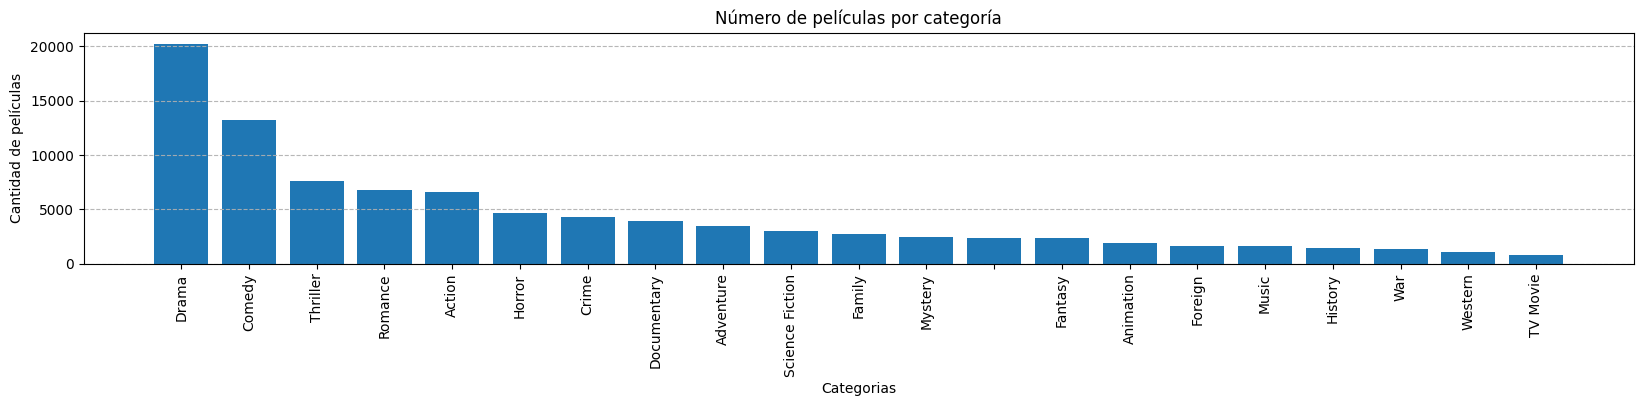

In [126]:
# Definimos el array proporcionado
data_array = data_movies_credits['genres'].values

# Filtramos el array para eliminar los elementos con '...'
filtered_array = data_array[data_array != '...']

# Creamos un diccionario para almacenar las frecuencias de cada categoría
category_count = {}

# Procesamos cada elemento del array filtrado y contamos las categorías
for item in filtered_array:
    # Eliminamos los corchetes y comillas para obtener una lista de categorías
    categories = item.strip("[]'").split("', '")
    # Contamos las categorías y las almacenamos en el diccionario
    for category in categories:
        category_count[category] = category_count.get(category, 0) + 1

# Creamos un DataFrame a partir del diccionario de frecuencias
y_categoria = pd.DataFrame(list(category_count.items()), columns=['Categoría', 'Frecuencia'])
#Ordenamos de forma descendente 
y_categoria = y_categoria.sort_values(by='Frecuencia', ascending=False)
# Mostramos el DataFrame
y_categoria 

plt.figure(figsize=(20, 3))
plt.bar(y_categoria['Categoría'], y_categoria['Frecuencia'])
plt.xlabel('Categorias')
plt.ylabel('Cantidad de películas')
plt.title('Número de películas por categoría')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(rotation=90)
plt.show()


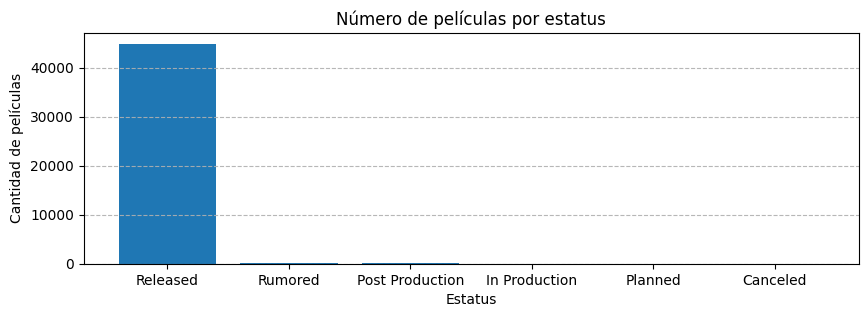

In [36]:
y_estatus= data_movies_credits['status'].value_counts()
y_estatus= y_estatus.reset_index()
y_estatus.columns = ['estatus', 'count']

plt.figure(figsize=(10, 3))
plt.bar(y_estatus['estatus'], y_estatus['count'])
plt.xlabel('Estatus')
plt.ylabel('Cantidad de películas')
plt.title('Número de películas por estatus')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

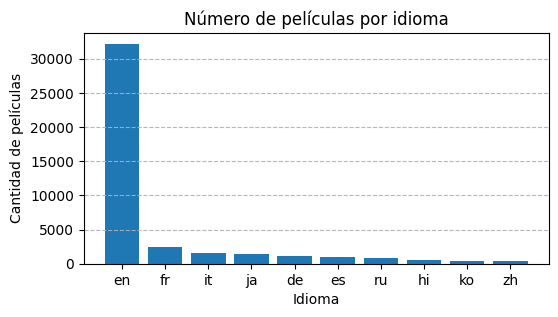

In [5]:
y_idioma= data_movies_credits['original_language'].value_counts()
y_idioma= y_idioma.reset_index()
y_idioma.columns = ['idioma', 'count']
top_10_idiomas = y_idioma.head(10)
plt.figure(figsize=(6, 3))
plt.bar(top_10_idiomas['idioma'], top_10_idiomas['count'])
plt.xlabel('Idioma')
plt.ylabel('Cantidad de películas')
plt.title('Número de películas por idioma')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

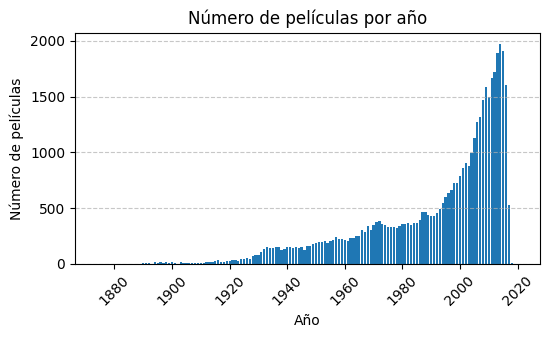

In [4]:
y_anio= data_movies_credits['release_year'].value_counts()
y_anio= y_anio.reset_index()
y_anio.columns = ['Anio', 'count']

#Graficamos 
plt.figure(figsize=(6, 3))
plt.bar(y_anio['Anio'], y_anio['count'])
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

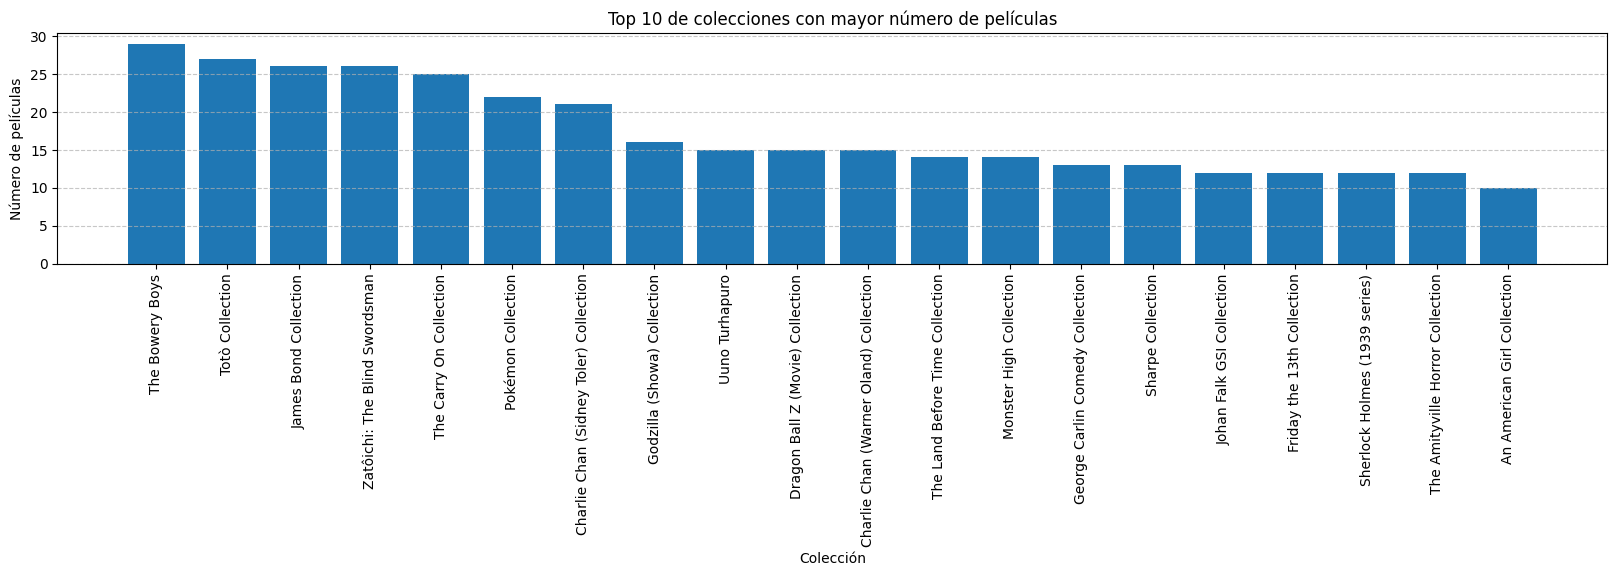

In [125]:
y_colecciones=data_movies_credits['belongs_to_collection'].value_counts()
y_colecciones= y_colecciones.reset_index()
y_colecciones.columns = ['Colecciones', 'count']
y_colecciones= y_colecciones.head(20)
#Graficamos 
plt.figure(figsize=(20, 3))
plt.bar(y_colecciones['Colecciones'], y_colecciones['count'])
plt.xlabel('Colección')
plt.ylabel('Número de películas')
plt.title('Top 10 de colecciones con mayor número de películas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

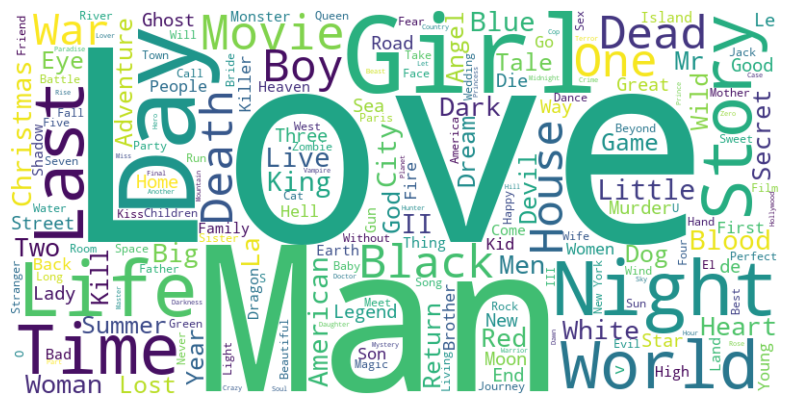

In [45]:
# Nube de palabras para los títulos de películas

from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_movies_credits['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()